# Programming for Data Analysis Project

---

### Autumn/Winter 2021
---

<br>

## The Session

<br>

___
#### Introduction  
The project brief stipulated that we *"create a data set by simulating a real-world phenomenon"*. It was further suggested we pick something that is of interest to us in our personal or professional life. I've decided to do something on music sessions and try to simulate a dataset based on the attendees at sessions in a given month in a particular pub in Cork city!
I'll try to work out all of the variables, examine their properties, potential data types, and how they relate to each other. I'll then try and work out code to simulate a random dataset based on that information.

![session1](images/session1.jpg)

<br>

#### The variables

The first challenge was to come up with a lost of variables, that were both appropriate and possible to simulate. The list below changed quite a few times after I discovered problems with some, and thought of others as the project progressed. A field trip helped! 😁

1. The players  
There can be anywhere between 3 and sometimes more than 10 musicians on any given night, and this particular pub (pre-covid!) would usually have 7 sessions a week. So that's a monthly range of between 84 and 280+. The brief asks for "at least one-hundred data points across at least four different variables" - I'm presuming it's unlikely my simulation will return a number below 100.
3 is always the minimum number of musicians, as they would be the paid hosts of the session. The norm would be around 5 or 6 musicians, but sometimes there might be more than 10 for a party or special occasion.

2. The instruments  
The range of instruments played includes fiddle, accordion, guitar, flute, uilleann pipes, bodhrán, bouzouki, banjo, concertina, mandolin, bass, and drums. Some of the instruments are particualar to a musical genre, while some would be found at all of the different sessions. Within that some instruments are more popular than others, with at least 1 guitar being found at every single session.

3. Genre  
While the pub mostly has Irish traditional music (ITM), there are also sessions of bluegrass, old-time, and blues music. The weekly breakdown is 4 ITM and 1 each of the other three.

4. Ability  
All of the musicians would be of differing ability levels. The hosts would normally be the most able. The guests can range from beginners just joining in, to experienced professional musicians passing through town. The pub in question is quite famous so there would be more of the latter. 

5. Age  
The pub in question is over 21s only and is regarded as an 'old man's pub'! The age range would be from 21 up to 80 I'd say, which would be equally spread out I think with possible spikes at either end of the spectrum. Age isn't necessarily connected to ability but can be! Generally the blugrass players tend to be older, while a lot of the ITM players would be younger.

6. Repertoire  
A top ITM musician would have a reportoire of hundreds if not thousands of tunes. However a top younger musicians mightn't have learnt that many tunes yet. Equally an intermediate older musician may have amassed a huge amount of tunes but not be great at playing them! Blues players would typically have a much smaller repertoire, while the blugrass/old-time musicians would be somewhere in between.

7. Paid  
The session would always have at least 3 hosts who would be paid. It's most common for these to be the best ability-wise, biggest repertoire, and older (but not always!). The typical instruments for ITM hosts would be accordion, fiddle and guitar. Whereas there may be more of a mix in the other genres, and more musicians sharing the fee.

8. Drink  
Just putting this in for the craic! The typical drinks might be Beamish, Guinness, Murphys, various lagers on tap, craft beers, red wine, spirits, water/soft drinks. The older hosts and musicians tend to drink Beamish and red wine! The younger craft beers and non-alcoholic drinks? Sweeping generalisations will abound here!

9. Quantity of drink  
I'm guessing most musicians would have around 4/5 drinks a night, whether that's alcoholic drinks or not. Some will certainly have more and some much less.

10. Night of the week  
The midweek nights have less musicians - sometime just the hosts - while the weekends are always busier. The age profile would always be older during the week (retirees!) while the weekend would have a bigger range. There would also be more drinking at the weekend!

11. Gender  
Men would certainly be in the majority at all sessions here! Blues and bluegrass sessions would nearly be entirely male, while there would be more women in the ITM sessions.

<br>

I need to examine each of these variables in much more detail and try and work out code to simulate them. I guess one of the ultimate goals in this will be whether myself or one of my colleagues could recognise ourselves in the results!

<br>

___
#### Examining the variables in detail and attempted coding

We begin by importing the necessary python packages.

In [1]:
# numerical arrays
import numpy as np

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt

# nicer plotting
import seaborn as sns

# module for choosing from a list
from secrets import choice

# python standard random library
import random

In [2]:
# set global style for seaborn plots
sns.set_style("darkgrid")

# set global figure size
plt.rcParams["figure.figsize"] = (15,10)

<br>

1. **The players**  

We'll decide that the month is January* so that's 30 days (not including New Year's Day 😁) so 30 sessions. The range for the amount of musicians at any particular session is 3-10. The datatype would obviously have to be integer. This value could also serve as the index as each attendee (or more correctly attendence as in reality a lot of people will atend on multiple occasions) will be unique.

I'm going to create an array of 30 values between 3 and 10 and then add them up**. We're using numpy.random to create a random number generator and then create the array of integers. I'm giving the random number generator a seed so the results will remain the same each time.*** This is a way of also ensuring I get over 100 variables!

\* an option later might be to give the user a option to choose a month?  
\** I could also create another dataset giving the breakdown in each session? I.e. 30 entries with a few of the same variables - gender, instruments, etc.
\*** I could also change give an option to change or remove the seed to give a different result each time?


In [3]:
# create a random number generator with seed
rng = np.random.default_rng(42)

# create an array of 30 numbers between 3 and 11 (non-inclusive)
x = rng.integers(3, 11, 30)
x

array([ 3,  9,  8,  6,  6,  9,  3,  8,  4,  3,  7, 10,  8,  9,  8,  9,  7,
        4,  9,  6,  7,  5,  4, 10,  9,  8,  6,  9,  7,  6])

It's hard to judge anything from that but we can create a `barplot` with `seaborn` to get a better idea.

<AxesSubplot:>

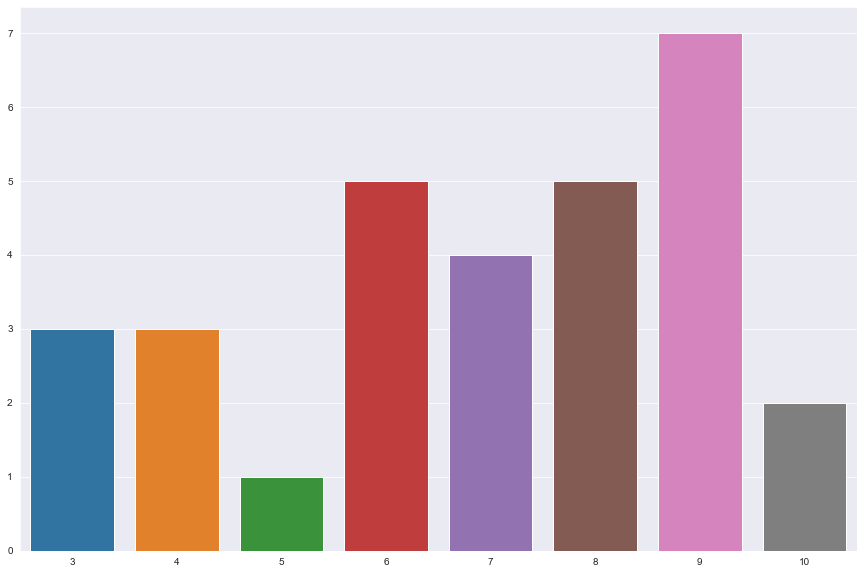

In [4]:
# add up the frequency of each unique value
unique, counts = np.unique(x, return_counts=True)

# plots the results
sns.barplot(x = unique, y = counts)

This doesn't reallty work as I want the average to be around 5/6 and there certainly aren't going to be that many sessions with 9 people. I need to find a normal distribution with a mean around 5. And with integers! And with no values below 3! The following is adapted from https://www.py4u.net/discuss/18951 and https://stackoverflow.com/questions/55806118/remove-elements-from-numpy-array-smaller-than-1.

The total number of attendances in January is 152


152

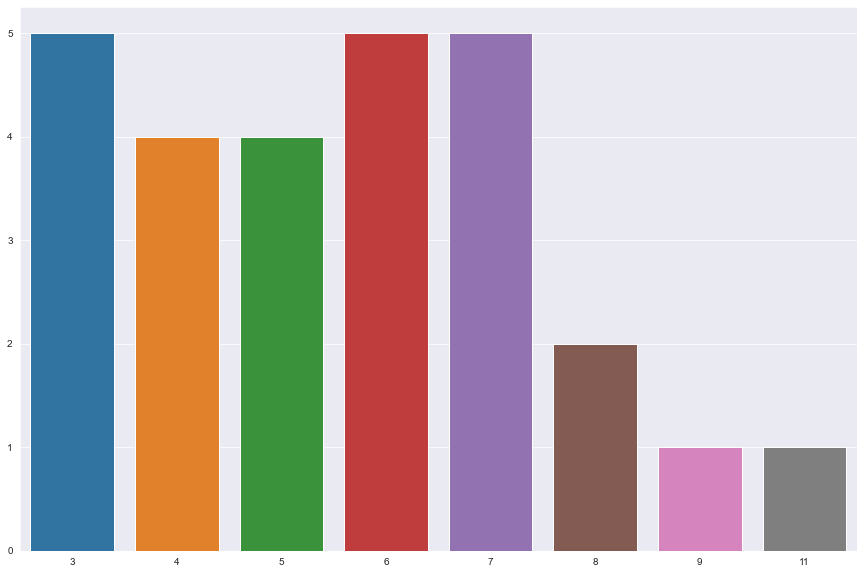

In [5]:
# sets mean, standard deviation and size of array
muso = rng.normal(loc=5, scale=3, size=30)

# rounds the values
musoInt = np.round(muso)

# removes values lower than 3
musoInt1 = musoInt[(musoInt > 2)]

# convert to integers
musoInt1 = musoInt1.astype(int)
# print(musoInt1)

# add up the frequency of each unique value
unique, counts = np.unique(musoInt1, return_counts=True)

# plots the results
sns.barplot(x = unique, y = counts)

# adds up the results and converts to an int
y = int(musoInt1.sum())

print(f'The total number of attendances in January is {y}')
y

This looks like a lot better representation of what the breakdown of attendences might be. We now need to turn the total into the first column of the dataframe. We create an array using `numpy` with the total as the upper limit. This is then converted into a `pandas` dataframe and the first column titled muso.

In [6]:
# create numPy array using x as upper limit
data = np.arange(y)

# turn it into a dataframe
df = pd.DataFrame(data, columns = ['muso'])

# have a look
df.head()

,muso
0,0
1,1
2,2
3,3
4,4


<br>

2. **The instruments**  
We need to create a list of the instuments first - datatype is obviously going to be a string. We then use `numpy.random.choice` to create another array the same size as the first column 'muso'. I weighted the percentage chance of returning each instrument (`p=[0.15, etc]`) so that guitar will be the most likely instrument to returned followed by fiddle and accordion. This variable doesn't need to be related to anything yet so we assign the instruments randomly as a new column. 

In [7]:
# create a list of instruments
instrs = ['guitar', 'fiddle', 'accordion', 'flute', 'uilleann_pipes', 'concertina', 'bodhrán',
        'mandolin', 'bass', 'banjo', 'drums', 'keyboard']

In [8]:
# we can pass in the probability for each item favoring one over the others
instrs = rng.choice(instrs, p=[0.3, 0.25, 0.15, 0.04, 0.03, 0.01, 0.025, 0.05, 
                               0.05, 0.045, 0.03, 0.02], size=y)

In [9]:
# adds this list as a column to the dataframe
df['instrument'] = instrs.tolist()

# have a look
df.head()

,muso,instrument
0,0,guitar
1,1,accordion
2,2,guitar
3,3,guitar
4,4,guitar


In [10]:
# prints out some info so far
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   muso        152 non-null    int64 
 1   instrument  152 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


I'm now going to set muso to be the index.

In [11]:
# set index
df.set_index("muso", inplace = True)

# have a look
df.head()

,instrument
muso,
0,guitar
1,accordion
2,guitar
3,guitar
4,guitar


<br>

3. **The genre**  

This is where things get a little more interesting! There are 4 main genres represented in the sessions - ITM, bluegrass, old-time American, and blues. The ITM sessions are 4 nights a week while the other genres have 1 night each. Some instruments are played at all sessions (guitar), while some are particular to a genre (accordion and ITM).

After a lot of research and experimentation I came up with the following solution!  
Matching the genre to instrument for some instruments was easy in that all the accordions and uilleann pipers played in the ITM sessions. The following code sorts that:
```
df.loc[df['instrument'] == 'accordion', 'genre'] = 'ITM'  
```
The guitar and the fiddle were a bit more tricky in that they played in sessions of different genres.  I first of all saved the count for each instrument that played in multiple genres. I used the `pandas.count` method and converted the result to integer using `astype(int)`

In [12]:
# isolate guitar in 'instrument column'
noGuitars = df[df['instrument']=='guitar']

# count and convert to int
noGuitars = noGuitars.count().astype(int)

noFiddles = df[df['instrument']=='fiddle']
noFiddles = noFiddles.count().astype(int)

noBanjos = df[df['instrument']=='banjo']
noBanjos = noBanjos.count().astype(int)

noMandolins = df[df['instrument']=='mandolin']
noMandolins = noMandolins.count().astype(int)

noBasses = df[df['instrument']=='bass']
noBasses = noBasses.count().astype(int)

I then needed to create variables of lists for each genre based on a particular instrument the number of each instrument, i,e, mandolin only plays bluegrass and old-time.

In [13]:
# guitar
genre1 = ['bluegrass', 'ITM', 'old-time', 'blues']

# bass
genre2 = ['bluegrass', 'old-time', 'blues']

# banjo
genre3 = ['bluegrass', 'ITM', 'old-time']

# mandolin
genre4 = ['bluegrass', 'old-time']

# fiddle
genre5 = ['ITM', 'bluegrass', 'old-time']

This is where I spent the most time!!! I used `random.choices` and `pandas.Series` to create arrays for each of the problematic instruments. I weighted the output to reflect what I though was appropriate and I had to specify the length of the array. I couldn't give a simple integer here (as the number will change if the code is run again without a seed), so I had to convert the `noGuitars` variable to an integer. This `pandas` series is then converted to a numpy array ready to be added to the dataframe.

In [14]:
# create a random pandas series for guitar
guitar = pd.Series(random.choices(genre1, weights=[1, 1, 1, 2], k=int(noGuitars)))
# converts to numpy array
guitar1 = guitar.to_numpy()

bass = pd.Series(random.choices(genre2, weights=[1, 1, 1], k=int(noBasses)))
bass1 = bass.to_numpy()

banjo = pd.Series(random.choices(genre3, weights=[2, 1, 2], k=int(noBanjos)))
banjo1 = banjo.to_numpy()

mandolin = pd.Series(random.choices(genre4, weights=[1, 1], k=int(noMandolins)))
mandolin1 = mandolin.to_numpy()

fiddle = pd.Series(random.choices(genre5, weights=[2, 1, 1], k=int(noFiddles)))
fiddle1 = fiddle.to_numpy()

The following code creates a new column entitled 'genre' and specifies what genre each muso plays based on their instrument.

In [15]:
# where instrument equals accordion, genre equals ITM, etc
df.loc[df['instrument'] == 'accordion', 'genre'] = 'ITM'  
df.loc[df['instrument'] == 'concertina', 'genre'] = 'ITM'  
df.loc[df['instrument'] == 'guitar', 'genre'] = guitar1
df.loc[df['instrument'] == 'bass', 'genre'] = bass1  
df.loc[df['instrument'] == 'mandolin', 'genre'] = mandolin1  
df.loc[df['instrument'] == 'banjo', 'genre'] = banjo1
df.loc[df['instrument'] == 'uilleann_pipes', 'genre'] = 'ITM'  
df.loc[df['instrument'] == 'flute', 'genre'] = 'ITM'  
df.loc[df['instrument'] == 'bodhrán', 'genre'] = 'ITM'
df.loc[df['instrument'] == 'keyboard', 'genre'] = 'blues'
df.loc[df['instrument'] == 'drums', 'genre'] = 'blues'
df.loc[df['instrument'] == 'fiddle', 'genre'] = fiddle1

# have a look
df.head(20)

,instrument,genre
muso,,
0,guitar,blues
1,accordion,ITM
2,guitar,blues
3,guitar,blues
4,guitar,blues
5,bodhrán,ITM
6,accordion,ITM
7,flute,ITM
8,bodhrán,ITM


Seems fine!

In [16]:
# # adds a new column with conditions
# df['genre'] = np.where((df['instrument'] == 'accordion') | (df['instrument']== 'concertina') | 
#                        (df['instrument'] == 'uilleann_pipes') | (df['instrument']== 'flute') |
#                        (df['instrument'] == 'bodhrán'), 'ITM', '')

# df.head()

In [17]:
# df['genre1'] = np.where((df['instrument'] == 'guitar'), guitar1, '')
# df.head(20)

In [18]:
# conditions = [
#     (df['instrument'] == 'accordion') | (df['instrument'] == 'concertina') | 
#     (df['instrument'] == 'uilleann_pipes') | (df['instrument']== 'flute') |
#     (df['instrument'] == 'bodhrán'), (df['instrument'] == 'drums') | 
#     (df['instrument'] == 'keyboard'), (df['instrument'] == 'mandolin'), 
#     (df['instrument'] == 'guitar'), (df['instrument'] == 'bass'), (df['instrument'] == 'banjo'), 
#     (df['instrument'] == 'mandolin')
# ]

# # create a list of the values we want to assign for each condition
# values = ['ITM', 'blues', 'old-time' [guitar1], [bass1], [banjo1], [mandolin1]]

# # create a new column and use np.select to assign values to it using our lists as arguments
# df['genre'] = np.select(conditions, values)
# df.head(20)

In [19]:
# for i in df['instrument']:
#     if 'instrument' == 'guitar':
# #         df['genre'] = rng2.choice(genre)
#         np.where(['instrument'] == 'guitar', guitar, '')
# #         df['Birth'] = df1.apply(lambda x: random.randrange(1905,1995, len(df1)),axis=1)
# #         df['genre'] = df.apply(lambda x: rng2.choice(genre), len(df),axis=1)
    
# df.head(20)

In [20]:
# guitar = pd.Series(random.choices(genre, weights=[1, 1, 1, 1], k=8))
# # pd.Series(random.choices(['yes','no'], weights=[1, 1], k=len(df), index=df.index)
# guitar

In [21]:
# rng2.choice(genre)

In [22]:
# for i in df['instrument']:
#     if 'instrument' == 'guitar':
#         df['genre'] = rng2.choice(genre)
# df.head(20)

<br>

4. **Ability**  

For the minute I'm going to go with a binary approach - intermediate or advanced. In reality there are no beginners at these sessions but there would be a big range of abilities so I may revisit. Ability isn't dependent on anything else - there are good and bad in all genres and each genre is performed to a similar level.  
We're using a similar method to above with `random.choice` and `pandas.Series`. We're assuming that half of the musicians are 'decent' and the other half are 'legends'!

I may create further ability categories here? Or do it on a 1-10 scale?

In [23]:
ability = pd.Series(random.choices(['decent','legend'], weights=[1, 1], k=len(df)))

In [24]:
# add new column to table
df['ability'] = ability.tolist()

# have a look
df.head(20)

,instrument,genre,ability
muso,,,
0,guitar,blues,legend
1,accordion,ITM,legend
2,guitar,blues,decent
3,guitar,blues,legend
4,guitar,blues,decent
5,bodhrán,ITM,legend
6,accordion,ITM,legend
7,flute,ITM,decent
8,bodhrán,ITM,decent


In [25]:
# # creates an array of booleans
# ability = rng.binomial(n=1, p=0.5, size=x)
# ability

# We get a big list of booleans! Can I convert this back to strings? In the meantime I'll just add to the dataframe as is.

In [26]:
# conditions = [
#     (df['ability'] == TRUE), (df['ability'] == FALSE)
# ]

# # create a list of the values we want to assign for each condition
# values = ['decent', 'wizz']

# # create a new column and use np.select to assign values to it using our lists as arguments
# df['ability'] = np.select(conditions, values)
# df.head(20)

In [27]:
# for i in ability:
#     if True:
#         ability.append('whizz')
#     else:
#         ability.append('handy_enough')

<br>

5. **Age**  

For now we're going to have 3 age-groups - college kids, grown-ups, old heads. The breakdown is going to be skewed towards the outer 2 ranges. Data type will be string. 

*Could also be age ranges? In which case it would be a list - maybe college kids, grown-ups, old heads! Or age ranges?*

In [28]:
# create the age_group variable
age_group = ['college_kid', 'so_called_grown-up', 'old-head']

In [29]:
# create new list
age_group = rng.choice(age_group, p=[0.4, 0.2, 0.4], size=y)

In [30]:
# add new column to dataframe
df['age_group'] = age_group.tolist()

# have a look
df

,instrument,genre,ability,age_group
muso,,,,
0,guitar,blues,legend,college_kid
1,accordion,ITM,legend,old-head
2,guitar,blues,decent,old-head
3,guitar,blues,legend,so_called_grown-up
4,guitar,blues,decent,college_kid
...,...,...,...,...
147,guitar,blues,decent,old-head
148,guitar,bluegrass,legend,college_kid
149,accordion,ITM,decent,so_called_grown-up


<br>

6. **Repertoire**  
We're going to create a list of ranges for this - 50-100, 100-200, 200-500, 500-1000, >1000. Typically the ITM musicians would have a much bigger repertoire, while the blues guys would have a much smaller repertoire. Something similar to the genre code above?

So I guess repertoire could be a big range! - maybe from 50 up to 2000? And would be directly related to age and possibly ability. Datatype integer? Or maybe range? i.e. 50-100, 100-200, 200-500, 500-1000, >1000? In which case an array?

In [31]:
# # create an array
# reportoire = ['50-100', '100-200', '200-500', '500-1000', '>1000']

# # create a random array with size x
# reportoire = rng.choice(reportoire, p=[0.2, 0.2, 0.2, 0.2, 0.2], size=x)

In [32]:
# # add to dataframe
# df['reportoire'] = reportoire.tolist()

# # have a look
# df

<br>

7. **Paid**  
Only the 'wizz' musos would typically be paid. Need to work that out? In the meantime I'll leave it that 20% of all musos get paid

In [33]:
paid = rng.binomial(n=1, p=0.2, size=x)

ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.

In [ ]:
df['paid'] = paid.tolist()
# df

8. **Drink**  
Here we'll create a list of the common drinks and for now divide them up randomly for now. A bit of thought needs to go into this though. Older ITM and bluegrass musicians may favour Beamish. Younger college kids maybe craft beer or non-alcoholic stuff.

In [ ]:
drinks = ['beamish', 'guinness', 'murphys', 'other_draft', 'craft_beers', 'red_wine', 'spirits', 'water/soft drinks']

In [ ]:
drinks = rng.choice(drinks, size=x)

In [ ]:
df['drinks'] = drinks.tolist()
# df

9. **Night of the week**  
We create a list of the days plus an option for 'more than one'. I skew it in favour of the weekend nights maybe. I will revisit this as the blues, bluegrass and old-time are each on a particular night! Maybe weekend, midweek, or both would be more appropriate?

In [ ]:
night = ['midweek', 'weekend', 'both']
night = rng.choice(night, p=[0.4, 0.5, 0.1], size=len(df))

In [ ]:
df['night'] = night.tolist()
# df

10. **Gender**  
Unfortunately the gender is way off the charts in this place! Maybe 20% women max! I can use the same code as for ability above and just skew it towards men.

In [ ]:
gender = pd.Series(random.choices(['male','female'], weights=[5, 1], k=len(df)))

In [ ]:
df['gender'] = gender.tolist()
# df

In [ ]:
# save to csv
df.to_csv('data/the_session.csv')

<br>

---
So far this is all completely random - just in case anyone is looking this far back!! 🤣

Now I have a try and come up with some code to create and simulate the relationships between values.

<br>
---

## References

https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

https://www.statology.org/add-numpy-array-to-pandas-dataframe/

https://www.py4u.net/discuss/18951

https://stackabuse.com/seaborn-bar-plot-tutorial-and-examples/

http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot

https://stackoverflow.com/questions/10741346/numpy-most-efficient-frequency-counts-for-unique-values-in-an-array

https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

https://stackoverflow.com/questions/65982695/insert-a-new-column-in-pandas-with-random-string-values

https://pandas.pydata.org/pandas-docs/version/0.24.0rc1/api/generated/pandas.Series.to_numpy.html

https://www.w3schools.com/python/ref_random_choices.asp

https://www.kite.com/python/answers/how-to-convert-a-list-into-a-pandas-dataframe-in-python

https://stackoverflow.com/questions/65762166/np-where-with-strings-and-multiple-conditions-to-create-a-new-column-in-excel

https://datatofish.com/if-condition-in-pandas-dataframe/

https://stackoverflow.com/questions/306400/how-can-i-randomly-select-an-item-from-a-list

<br>

---
# END